In [9]:
import experiment
import models

from experiment import *

In [10]:
sim = Exp()
concs = np.geomspace(0.1, 100, 10)
concs = [c*0.1e-6 for c in concs]

start = 0
stop = 100000
for c in concs:
    sim.add_dataset(np.linspace(start,stop*2,stop), np.linspace(start,stop*2,stop))
    sim.datasets[-1].add_step(start, stop, c)
    sim.datasets[-1].add_step(stop, stop*2, 0)



In [11]:
sim.model = models.Two_state()
try:
    sim.model.params_definitions['ymax1'].user_data['type']='global'
    sim.model.params_definitions['ymax2'].user_data['type']='global'
except:
    sim.model.params_definitions['ymax'].user_data['type']='global'
sim.create_params()


In [12]:
ys = []
s='''
ymax_ds0	2.60434646	0.85974132	(33.01%)	1	0.00000000	1000.00000	True
ymax_ds2	2.00544682	0.53509003	(26.68%)	1	0.00000000	1000.00000	True
ymax_ds4	1.59102747	0.26149714	(16.44%)	1	0.00000000	1000.00000	True
ymax_ds5	3.39942249	1.59709047	(46.98%)	1	0.00000000	1000.00000	True
ymax_ds6	3.00720301	1.16594611	(38.77%)	1	0.00000000	1000.00000	True
ymax_ds7	3.20074149	1.54207090	(48.18%)	1	0.00000000	1000.00000	True
ymax_ds8	2.98869349	1.16035102	(38.82%)	1	0.00000000	1000.00000	True
ymax_ds9	2.14465069	0.72825441	(33.96%)	1	0.00000000	1000.00000	True
ymax_ds10	1.80316938	0.48787465	(27.06%)	1	0.00000000	1000.00000	True
ymax_ds11	1.51648843	0.25208778	(16.62%)	1	0.00000000	1000.00000	True
ymax_ds12	2.97345609	1.15551998	(38.86%)	1	0.00000000	1000.00000	True
ymax_ds13	2.22590416	0.75120317	(33.75%)	1	0.00000000	1000.00000	True
'''

for line in s.split('\n'):
    try:
        ys.append(float(line.split()[1]))
    except:
        pass

sum(ys)/len(ys)


2.4550458316666663

In [13]:
sim.params['ka1'].value =  1355.72800
sim.params['kd1'].value = 	0.02021307
sim.params['ka2'].value =	0.00477923
sim.params['kd2'].value =	4.0950e-04

sim.params['ymax'].value = 2.4550458316666663


    # sim.params['ymax1'].value = 1
    # sim.params['ymax2'].value = 0.2

#ymax = sim.params['ymax'].value

In [14]:
sim.params

name,value,initial value,min,max,vary
ka1,1355.72800,10000.0,10.0000000,10000000.0,True
kd1,0.02021307,0.01,1.0000e-06,0.10000000,True
ka2,0.00477923,0.01,1.0000e-07,10000000.0,True
kd2,4.0950e-04,0.01,1.0000e-07,10000000.0,True
ymax,2.45504583,1,0.00000000,1000.00000,True


In [15]:
sim.simulate_response(None, 0, 0)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

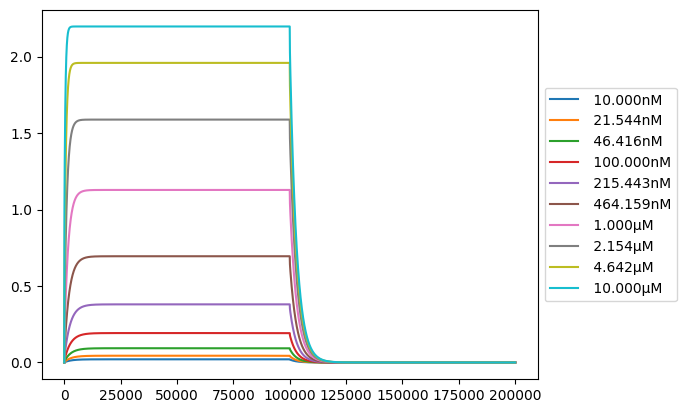

In [16]:
sim.plot()

In [166]:
xs = []
ys = []
for ds in sim:
    xs.append(ds.steps[0].concentration)
    t = ds.t>=ds.steps[0].stop
    y = ds.response[t][0]
    ys.append(y)


In [17]:
# import numpy as np
# import scipy.optimize
# import matplotlib.pyplot as plt

# xs = np.array(xs)
# ys = np.array(ys)

# xs_fitted = np.linspace(0, xs[-1], num=100)

# def func(x, Kd):
#     return ymax*x/(Kd+x)

# p0 = (1e-6)

# params, cv = scipy.optimize.curve_fit(func, xs, ys, p0)
# print(params)
# # perform the fit
# Kd = params[0]


# # determine quality of the fit
# squaredDiffs = np.square(ys - func(xs, Kd))
# squaredDiffsFromMean = np.square(ys - np.mean(ys))
# rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
# print(f"R² = {rSquared}")

# # plot the results
# plt.plot(xs, ys, '.', label="data")
# plt.plot(xs_fitted, func(xs_fitted, Kd), '--', label="fitted")
# # plt.title(f"Y = {Rmax:.2f} * e^(-{Kd:.2f} * t)")

# # inspect the parameters


# plt.show()


1e-08 0.02068863110598862 5e-09
1.5000000000000002e-08 0.030902738223987473 5e-09
2e-08 0.041031490511825974 5e-09
2.5e-08 0.05107595342724224 5e-09
3e-08 0.06103717476915185 5e-09
3.4999999999999996e-08 0.07091618503970497 5e-09
3.9999999999999994e-08 0.0807139978022414 5e-09
4.499999999999999e-08 0.0904316100269806 5e-09
4.999999999999999e-08 0.10007000242881844 5e-09
5.499999999999999e-08 0.1096301397978996 5e-09
6e-08 0.11911297132125713 5e-09
6.5e-08 0.1285194308963697 5e-09
7e-08 0.13785043743960546 5e-09
7.500000000000001e-08 0.14710689518278286 5e-09
8.000000000000001e-08 0.15628969396764425 5e-09
8.500000000000002e-08 0.1653997095298271 5e-09
9.000000000000003e-08 0.1744378037779503 5e-09
9.500000000000003e-08 0.1834048250642757 5e-09
1.0000000000000004e-07 0.1923016084513198 5e-09
1.0500000000000004e-07 0.20112897597077906 5e-09
1.1000000000000005e-07 0.20988773687657292 5e-09
1.1500000000000005e-07 0.21857868789210486 5e-09
1.2000000000000004e-07 0.22720261345200451 5e-09
1.

(<Figure size 640x480 with 1 Axes>, <Axes: >)

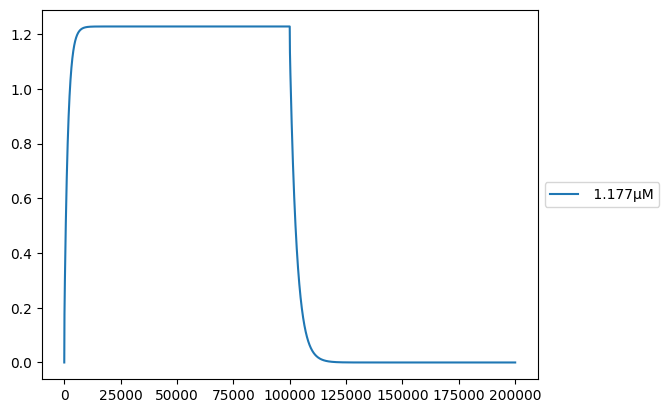

In [18]:
c=concs[0]
t = sim.datasets[0].t<=sim.datasets[0].steps[0].stop
start = sim.datasets[0].steps[0].start
stop = sim.datasets[0].steps[0].stop
diff = c/2
try:
    ymax = sim.params['ymax'].value
except:
    ymax = sim.params['ymax1'].value+sim.params['ymax2'].value+sim.params['ymax3'].value

for i in range(1000):
    temp = Exp()
    temp.model = sim.model
    temp.params = sim.params
    temp.add_dataset(np.linspace(start,stop*2,stop), np.linspace(start,stop*2,stop))
    temp.datasets[-1].add_step(start, stop, c)
    temp.datasets[-1].add_step(stop, stop*2, 0)
    temp.simulate_response(None, 0, 0)
    y = temp.datasets[0].response[t][-1]
    print(c, y, diff)
    
    if y<ymax/2:
        c=c+diff
    else:
        c=c-diff/2
        diff = diff/2

temp.plot()

In [169]:
ymax

3.8948508204295473

In [80]:
	2.4746e-05/	261482.150

9.463743509834228e-11

In [494]:
ds.response[t][0]

0.0

In [188]:
start = 0
stop = 100000
for c in concs:
    sim.add_dataset(np.linspace(start,stop,stop), np.linspace(1000,2000,1000))
    sim.datasets[-1].add_step(start, stop-1000, c)
    sim.datasets[-1].add_step(stop-1000, stop, 0)